# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Here’s The Line Separating Bitcoin Dominance From Altcoin Season.  For months, Bitcoin stole the show when it came to crypto, sucking the capital out of the altcoin market. Shortly after the top cryptocurrency started its pullback, profits began to flow back into altcoins that have since been soaring over the last month. BTC dominance shows how down to the wire the fight between Bitcoin [&#8230;] ... [| Skaityti daugiau](https://www.newsbtc.com/analysis/btc/heres-the-line-separating-bitcoin-dominance-from-altcoin-season/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- 'A toll on everyone's soul:' Inside 2 hospitals' struggle to save lives from COVID-19 | CBC News.  During the coronavirus pandemic, Canadians are being told to stay home to keep hospitals from being overwhelmed. Yet most of us have no idea about what's happening inside our hospitals, specifically intensive care units. Watch how staff at two of Canada's lar… ... [| Skaityti daugiau](http://www.cbc.ca/news/health/covid-19-hospital-icu-inside-look-toronto-1.5890046) 

### Kainų kaita pandemijos metu

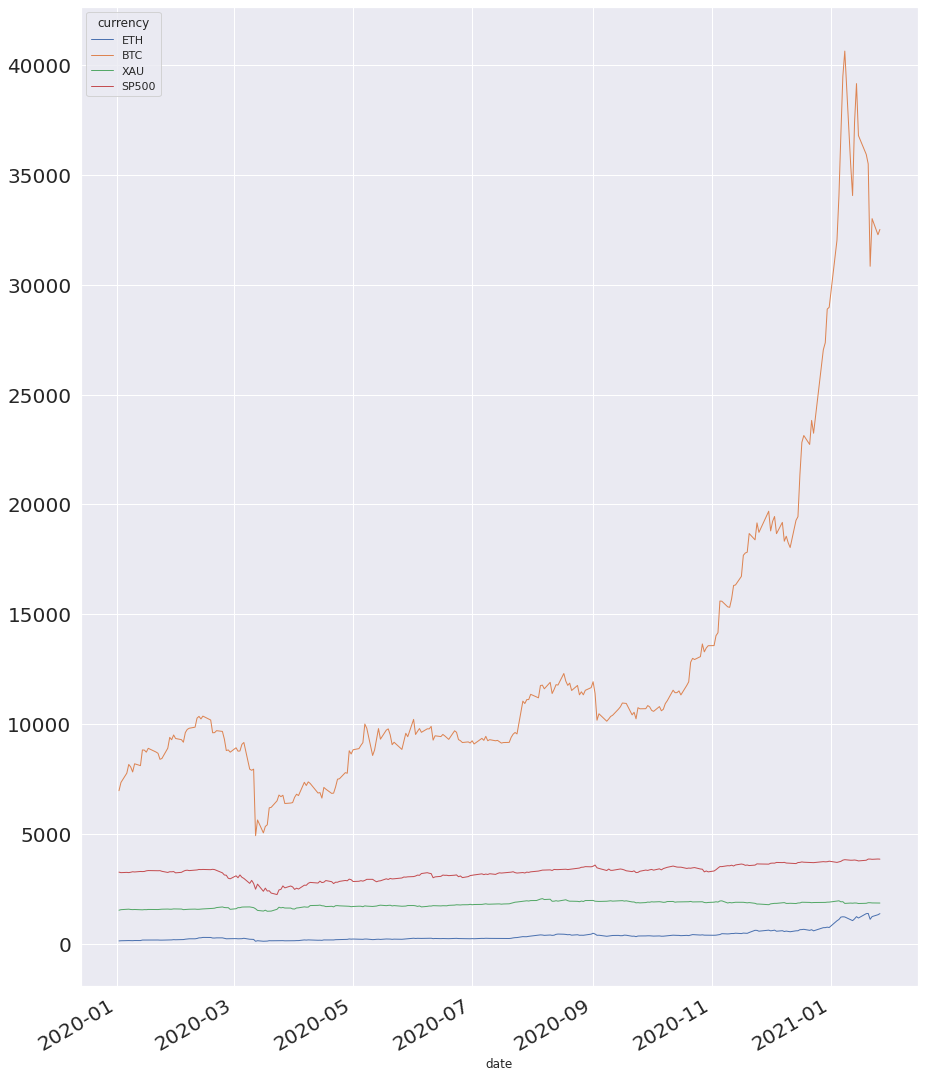

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.971837,0.513161,0.745530
BTC,0.971837,1.000000,0.423407,0.735292
XAU,0.513161,0.423407,1.000000,0.581718
SP500,0.745530,0.735292,0.581718,1.000000


In [8]:
#hide ### Koreliacijos matrica.

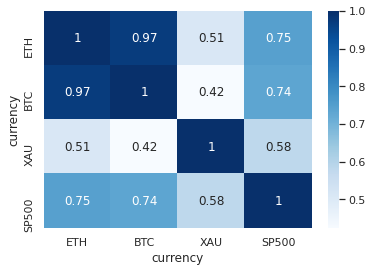

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')